In [1]:
# The idea for this program is for ti to read in a given CSV file from the user and then graph the data
# Then calculate the relevant metrics (mean median etc.)
# Step 1 have python import relevant libraries and import the CSV
#Step 1

In [1]:
#Step 1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [2]:
#Note: Need to save file as UTF-8 for it to work. File extenstion will be .csv instead of xlsx. 
#Note: to get correct path name for file press shift +right click then change all \ to /

biodata=pd.read_csv('C:/Users/RileyS/Desktop/SJR NBS Fellow/Projects/Biotinidase Assay/Data/BTD ABS data/PTD2.csv')
bio_samp_num=pd.read_csv('C:/Users/RileyS/Desktop/SJR NBS Fellow/Projects/Data Managment/BTDsampleexample.csv')

biodf1=pd.DataFrame(biodata)
bsndf1=pd.DataFrame(bio_samp_num)

print(biodf1.head())
print(bsndf1.head())

               Results Unnamed: 1  Unnamed: 2
0  Actual Temperature:       22.2         NaN
1                  NaN        NaN         NaN
2                  NaN       Well     546.000
3                  NaN         A1       0.170
4                  NaN         A2       0.059
                 1      PKUSER 20210907  Unnamed: 3  \
0  Biotinidase-PRH  2124620005      A01         NaN   
1  Biotinidase-PRH  2124620022      A02         NaN   
2  Biotinidase-PRH  2124620025      A03         NaN   
3  Biotinidase-PRH  2124620031      A04         NaN   
4  Biotinidase-PRH  2124620042      A05         NaN   

       Copy columns A, B and C of DBS worklist and   \
0  PASTE VALUES into colums A, B and C of this page   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

                               Unnamed: 5           Unnamed: 6

In [5]:
biodf1['Absorbance']=biodf1['Unnamed: 2']
dfmerge=pd.DataFrame([bsndf1.PKUSER,biodf1.Absorbance])
dftrans=dfmerge.transpose()
dftrans['Absorbance'][2]=0
print(dftrans.head())


       PKUSER Absorbance
0  2124620005        NaN
1  2124620022        NaN
2  2124620025          0
3  2124620031       0.17
4  2124620042      0.059


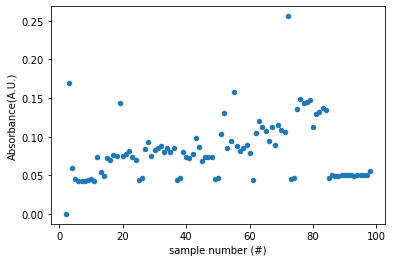

In [7]:
dftrans.reset_index().plot(kind='scatter',x='index', y='Absorbance')
plt.xlabel('sample number (#)')
plt.ylabel('Absorbance(A.U.)')
plt.show()

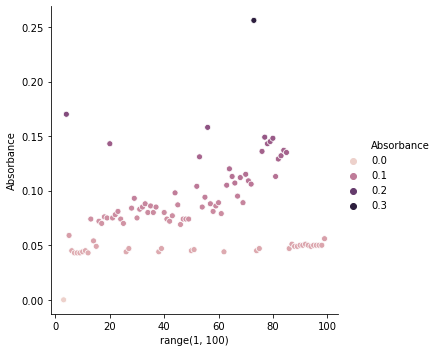

In [9]:
sns.relplot(x=range(1,100),y='Absorbance',data=dftrans,kind='scatter',hue='Absorbance')

In [10]:
# function sets a cutt of critera and counts the number of samples that fail the cut of critera. 

def critical_samples(df):
    crit_sample=0
    crit_sample_id=[]
    for sample in df:
        if sample<0.070:
            crit_sample=crit_sample+1
        else:
            pass 
    return crit_sample
    
    

In [11]:
critical_samples(dftrans['Absorbance'])

35

In [12]:
# Function that take samples that fail cut of criteria and puts them in a list with text "These samples need to be retested."
def critical_samples2(df):
    crit_sample_id=[]
    for absorbance,pkuser in df:
        if absorbance<0.070:
            crit_sample_id.append(pkuser)
        else:
            pass 
    return crit_sample_id

In [13]:
list1=dftrans['PKUSER'].tolist()
list2=dftrans['Absorbance'].tolist()
print(list1)
print(list2)

['2124620005', '2124620022', '2124620025', '2124620031', '2124620042', '2124620046', '2124620068', '2124620074', '2124620076', '2124620078', '2124620102', '2124620103', '2124620123', '2124620137', '2124620149', '2124720014', '2124720035', '2124720109', '2124720112', '2124720113', '2124720149', '2124720153', '2124720192', '2124720195', '2124720196', '2124720197', '2124720198', '2124720215', '2124720234', '2124720245', '2124720249', '2124720256', '2124720257', '2124720262', '2124720264', '2124720274', '2124720295', '2124720297', '2124720298', '2124720303', '2124720322', '2124720323', '2124720328', '2124720338', '2124720339', '2124720357', '2124720374', '2124610047', '2124610047', '2124610047', '2124610047', '2124610047', '2124610047', '2124520139', '2124520139', '2124520139', '2124520139', '2124520139', '2124510195', '2124510195', '2124510195', '2124510195', '2124510195', '2124510195', 'POS', 'NEG', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [14]:
dict1=dict(zip(list1,list2))
print(dict1)

{'2124620005': nan, '2124620022': nan, '2124620025': 0, '2124620031': 0.17, '2124620042': 0.059000000000000004, '2124620046': 0.045, '2124620068': 0.043, '2124620074': 0.043, '2124620076': 0.043, '2124620078': 0.044000000000000004, '2124620102': 0.045, '2124620103': 0.043, '2124620123': 0.07400000000000001, '2124620137': 0.054000000000000006, '2124620149': 0.049, '2124720014': 0.07200000000000001, '2124720035': 0.07, '2124720109': 0.076, '2124720112': 0.075, '2124720113': 0.14300000000000002, '2124720149': 0.075, '2124720153': 0.078, '2124720192': 0.081, '2124720195': 0.07400000000000001, '2124720196': 0.07, '2124720197': 0.044000000000000004, '2124720198': 0.047, '2124720215': 0.084, '2124720234': 0.09300000000000001, '2124720245': 0.075, '2124720249': 0.083, '2124720256': 0.085, '2124720257': 0.08800000000000001, '2124720262': 0.08, '2124720264': 0.086, '2124720274': 0.08, '2124720295': 0.085, '2124720297': 0.044000000000000004, '2124720298': 0.047, '2124720303': 0.08, '2124720322': 

In [15]:
for key in dict1:
    if dict1[key]<0.070:
        print(key,'coressponds to ',dict1[key])
    else:
        pass

2124620025 coressponds to  0
2124620042 coressponds to  0.059000000000000004
2124620046 coressponds to  0.045
2124620068 coressponds to  0.043
2124620074 coressponds to  0.043
2124620076 coressponds to  0.043
2124620078 coressponds to  0.044000000000000004
2124620102 coressponds to  0.045
2124620103 coressponds to  0.043
2124620137 coressponds to  0.054000000000000006
2124620149 coressponds to  0.049
2124720197 coressponds to  0.044000000000000004
2124720198 coressponds to  0.047
2124720297 coressponds to  0.044000000000000004
2124720298 coressponds to  0.047
2124720357 coressponds to  0.069
nan coressponds to  0.045
nan coressponds to  0.047
nan coressponds to  0.047
nan coressponds to  0.051
nan coressponds to  0.049
nan coressponds to  0.049
nan coressponds to  0.05
nan coressponds to  0.05
nan coressponds to  0.051
nan coressponds to  0.05
nan coressponds to  0.049
nan coressponds to  0.05
nan coressponds to  0.05
nan coressponds to  0.05
nan coressponds to  0.05
nan coressponds to

In [17]:
def retest_samples(dic):
    crit_sample_id=[]
    for key in dic:
        if dic[key]<0.070:
            print(key,'coressponds to ',dict1[key])
        else:
            pass
    return crit_sample_id

In [18]:
retest_samples(dict1)

2124620025 coressponds to  0
2124620042 coressponds to  0.059000000000000004
2124620046 coressponds to  0.045
2124620068 coressponds to  0.043
2124620074 coressponds to  0.043
2124620076 coressponds to  0.043
2124620078 coressponds to  0.044000000000000004
2124620102 coressponds to  0.045
2124620103 coressponds to  0.043
2124620137 coressponds to  0.054000000000000006
2124620149 coressponds to  0.049
2124720197 coressponds to  0.044000000000000004
2124720198 coressponds to  0.047
2124720297 coressponds to  0.044000000000000004
2124720298 coressponds to  0.047
2124720357 coressponds to  0.069
nan coressponds to  0.045
nan coressponds to  0.047
nan coressponds to  0.047
nan coressponds to  0.051
nan coressponds to  0.049
nan coressponds to  0.049
nan coressponds to  0.05
nan coressponds to  0.05
nan coressponds to  0.051
nan coressponds to  0.05
nan coressponds to  0.049
nan coressponds to  0.05
nan coressponds to  0.05
nan coressponds to  0.05
nan coressponds to  0.05
nan coressponds to

[]

In [22]:
def retest_samples2(dic):
    crit_sample_id=[]
    for key,value in dic.items():
        if value<0.070:
            print(key,value)
        else:
            pass
    return crit_sample_id

In [23]:
retest_samples2(dict1)

2124620025 0
2124620042 0.059000000000000004
2124620046 0.045
2124620068 0.043
2124620074 0.043
2124620076 0.043
2124620078 0.044000000000000004
2124620102 0.045
2124620103 0.043
2124620137 0.054000000000000006
2124620149 0.049
2124720197 0.044000000000000004
2124720198 0.047
2124720297 0.044000000000000004
2124720298 0.047
2124720357 0.069
nan 0.045
nan 0.047
nan 0.047
nan 0.051
nan 0.049
nan 0.049
nan 0.05
nan 0.05
nan 0.051
nan 0.05
nan 0.049
nan 0.05
nan 0.05
nan 0.05
nan 0.05
nan 0.055999999999999994


[]